In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datafile = '/content/drive/MyDrive/Colab Notebooks/prz3/bodmas.npz'
data = np.load(datafile)
X = data['X'] # загружаем датасет, как указано на сайте
y = data['y']
print(X.shape, y.shape)

(134435, 2381) (134435,)


In [ ]:
df = pd.DataFrame(X)
df.head() # для удобной обработки переведём его в датафрейм

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(134435, 2381)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
count,134435.000000,1.344350e+05,1.344350e+05,134435.000000,134435.000000,134435.000000,134435.000000,134435.000000,134435.000000,134435.000000,...,1.344350e+05,1.344350e+05,1.344350e+05,1.344350e+05,1.344350e+05,1.344350e+05,1.344350e+05,1.344350e+05,1.344350e+05,1.344350e+05
mean,0.172645,1.010058e-02,6.500319e-03,0.005235,0.006897,0.004137,0.004883,0.003462,0.005583,0.003182,...,9.626896e+05,8.738787e+05,5.165681e+05,8.146577e+05,7.881240e+05,1.007259e+06,3.951367e+05,6.478354e+05,1.250015e+07,4.992830e+05
std,0.190497,1.705026e-02,6.990666e-03,0.006139,0.008296,0.004133,0.005712,0.003811,0.003947,0.003274,...,5.106428e+07,3.964426e+07,3.834976e+07,4.814588e+07,5.777078e+07,4.260502e+07,3.066413e+07,3.782341e+07,1.492778e+08,3.673602e+07
min,0.000127,4.840046e-07,2.765741e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.018336,3.932182e-03,3.635159e-03,0.003149,0.003747,0.002589,0.002478,0.002123,0.003523,0.001717,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.120494,6.536479e-03,4.371869e-03,0.003999,0.004731,0.003864,0.003808,0.003573,0.004339,0.003130,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.200000e+01,8.408000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.250196,1.353226e-02,7.140411e-03,0.006340,0.008649,0.004910,0.005038,0.003977,0.007394,0.003904,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.880000e+02,1.288340e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.999983,9.880831e-01,3.207031e-01,0.343288,0.362614,0.408537,0.314893,0.679162,0.123530,0.329137,...,3.286756e+09,3.590280e+09,3.758097e+09,3.347698e+09,4.283486e+09,3.914422e+09,3.771926e+09,3.823243e+09,3.758097e+09,2.906326e+09


Датасет не имеет названия признаков, из-за чего ориентироваться в нём довольно сложно. К тому же, в нём более двух тысяч признаков. Рассматривать каждый из них будет сложно, не говоря уже об обучении модели на них. Попробуем избавиться от тех, которые, скорее всего, не несут полезной информации.

In [ ]:
df.dropna(axis=1, how='any', inplace=True)
df.head() # попробуем убрать столбцы с NaN, но их не оказалось

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dropcol = [] # полностью нулевые стобцы тоже попробуем отбросить
for n in df.columns:
    if df[n].std() == 0:
      dropcol.append(n)
df.drop(dropcol, axis=1, inplace=True)
df.head() # на этот раз получилось отбросить около 50 столбцов, что всё равно мало

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dropcol = [] # уберём столбцы, в которых наименьший разброс значений
for n in df.columns:
    if df[n].std() <= 0.1:
      dropcol.append(n)
df.drop(dropcol, axis=1, inplace=True)
df.head()

,0,144,256,265,512,513,514,611,612,613,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.006669,0.000000,0.000000e+00,156.0,6.000000,936.0,6.439958,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004166,0.000000,0.000000e+00,9695.0,5.666426,54936.0,6.580194,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.003931,0.000000,0.000000e+00,2967.0,5.909673,17534.0,6.565606,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003704,0.000000,0.000000e+00,14107.0,5.785355,81614.0,6.581691,0.0,8.0,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003783,0.004743,7.734128e-07,17064.0,5.622832,95948.0,6.584044,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134435 entries, 0 to 134434
Columns: 1501 entries, 0 to 2380
dtypes: float32(1501)
memory usage: 769.8 MB


Удалось отсеять почти тысячу признаков, однако имеющееся количество всё ещё довольно большое. Но попробуем поработать с ними

(array([77142.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 57293.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

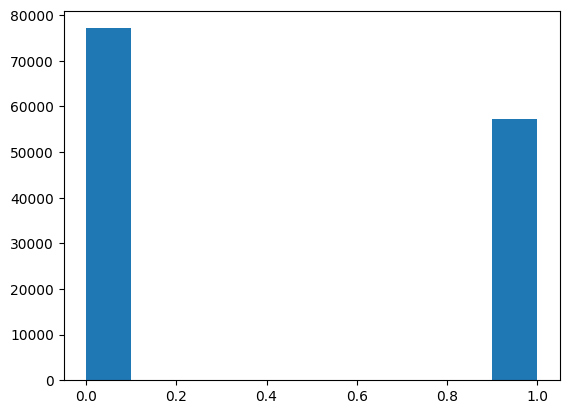

In [ ]:
plt.hist(y) # соотношение классов

In [ ]:
df['Malware'] = y
df.head()

,0,144,256,265,512,513,514,611,612,613,...,2372,2373,2374,2375,2376,2377,2378,2379,2380,Malware
0,0.056742,0.006669,0.000000,0.000000e+00,156.0,6.000000,936.0,6.439958,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.007062,0.004166,0.000000,0.000000e+00,9695.0,5.666426,54936.0,6.580194,0.0,0.0,...,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0,0
2,0.020975,0.003931,0.000000,0.000000e+00,2967.0,5.909673,17534.0,6.565606,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.006482,0.003704,0.000000,0.000000e+00,14107.0,5.785355,81614.0,6.581691,0.0,8.0,...,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0,0
4,0.022135,0.003783,0.004743,7.734128e-07,17064.0,5.622832,95948.0,6.584044,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<ipython-input-54-6b905d08d23e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-54-6b905d08d23e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your cod

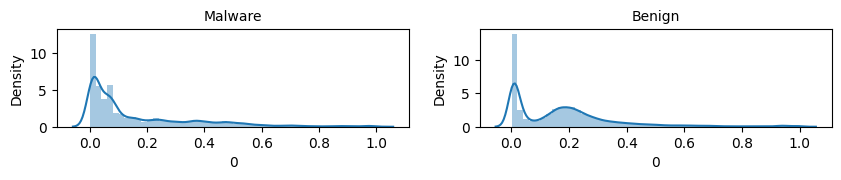

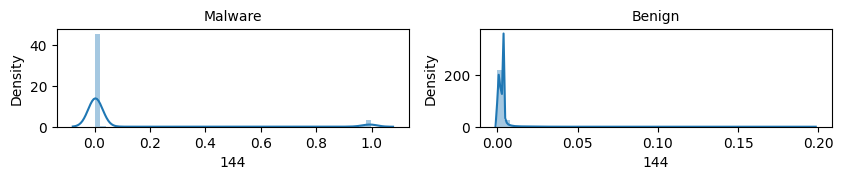

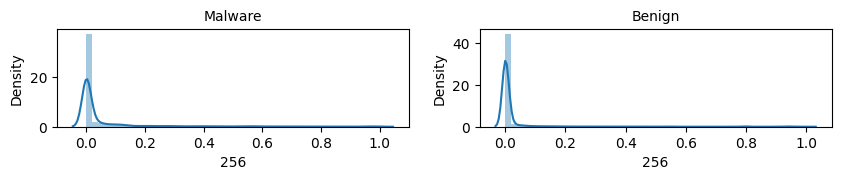

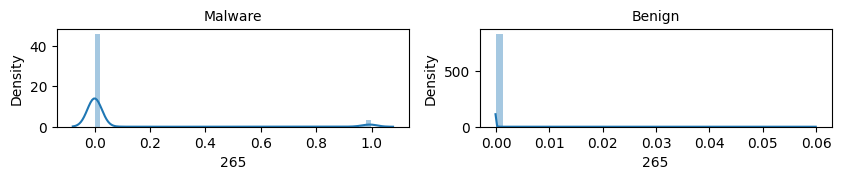

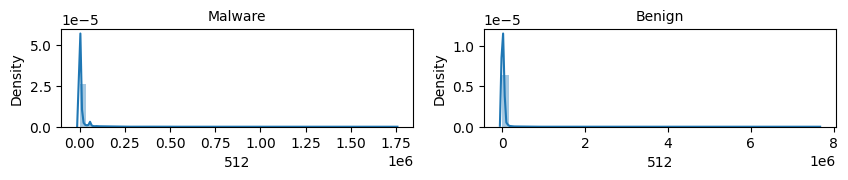

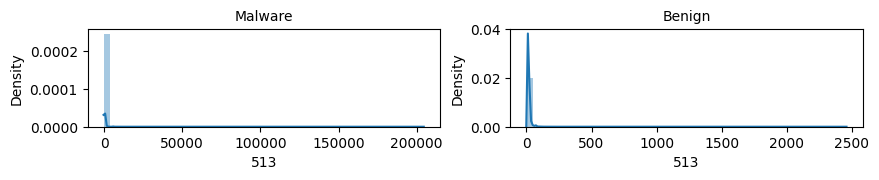

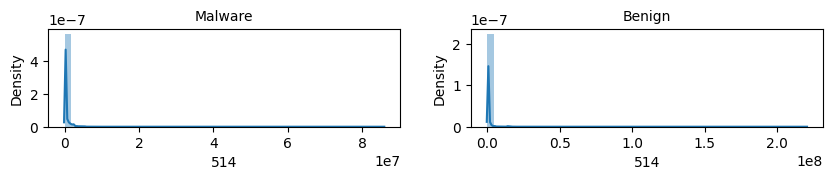

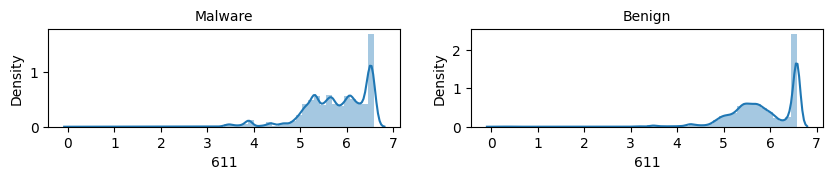

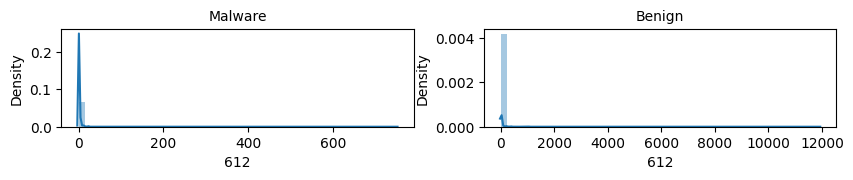

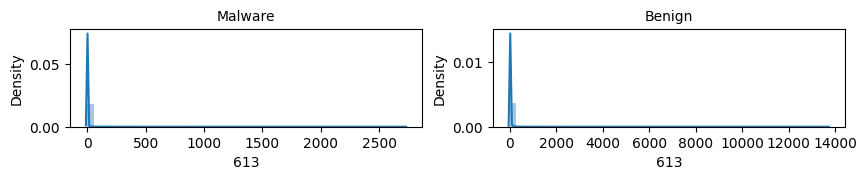

In [ ]:
features = df.columns[:10]
i=1 # визуализируем первые 10 признаков
for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(df[df['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i+=2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Malware'], axis=1), df['Malware'], test_size=0.2, random_state=0)

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, random_state=0,
                         oob_score = True,
                         max_depth = 8)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, oob_score=True,
                       random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware'])) # как ни странно, получилось обучить довольно точную модель

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98     15375
     Malware       0.96      0.98      0.97     11512

    accuracy                           0.97     26887
   macro avg       0.97      0.97      0.97     26887
weighted avg       0.97      0.97      0.97     26887



Text(50.722222222222214, 0.5, 'True labels')

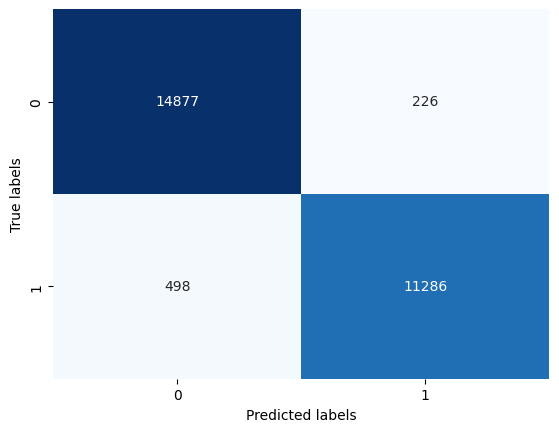

In [ ]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

<ipython-input-89-69fd4125ef7a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_dict.keys())[::-1], y=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

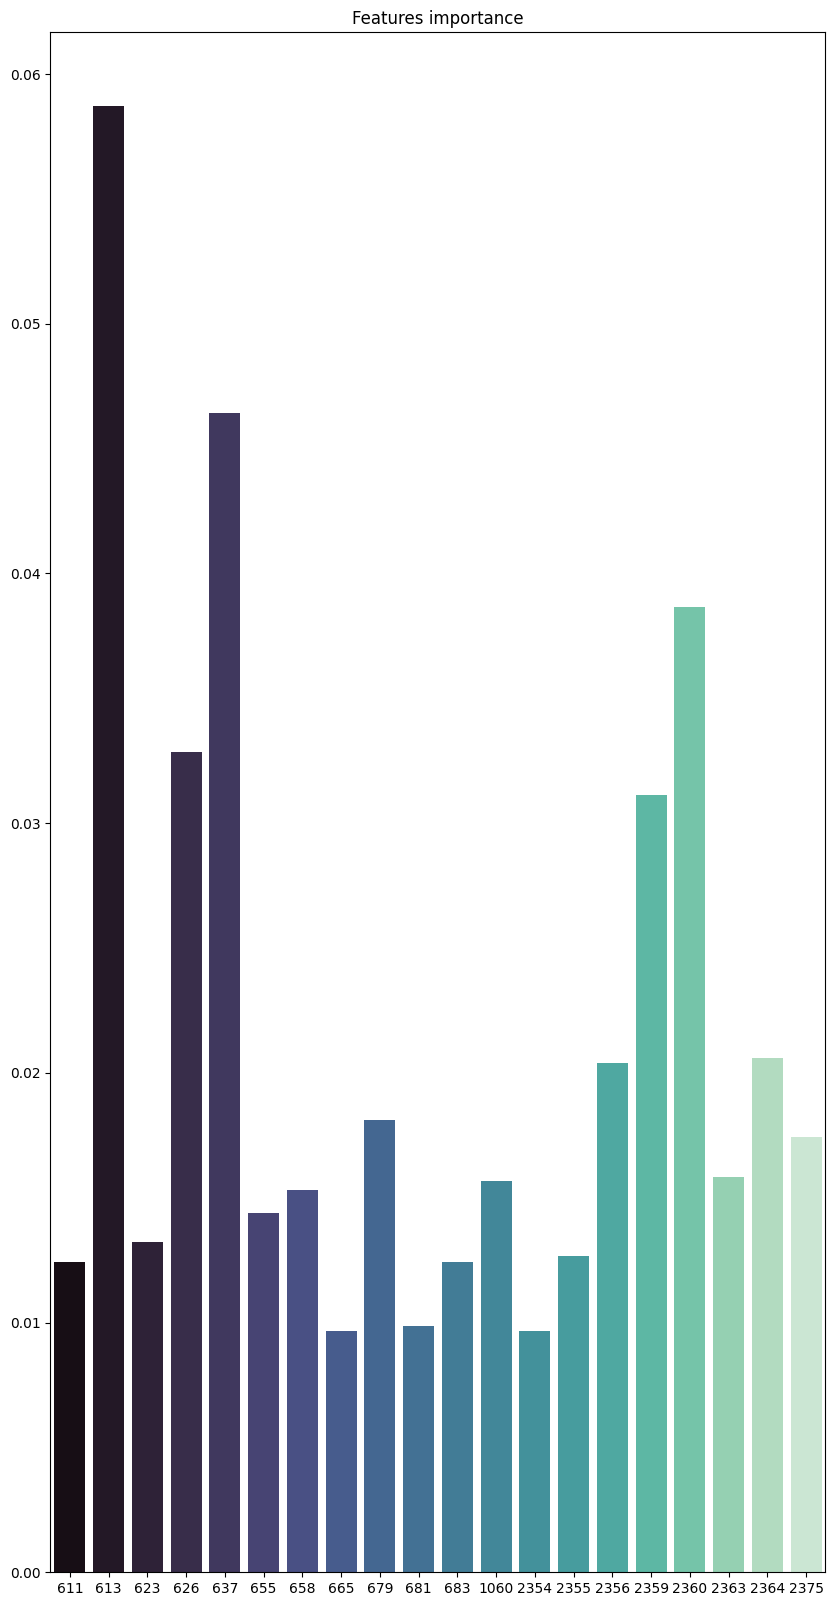

In [ ]:
importance = rfc.feature_importances_ # выведем только 20 самых важных признаков
importance_dict = {df.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])[-20:]}
plt.figure(figsize=(10, 20))
sns.barplot(x=list(sorted_dict.keys())[::-1], y=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance') # увидим, что наибольший вклад даёт признак под номером 613

In [ ]:
visfeat = sorted(importance_dict.items(), key=lambda item: item[1])[-10:]
# ещё раз визуализируем признаки, но на этот раз 10 лучших

2363


In [ ]:
features = []
for i in visfeat:
  features.append(i[0])
print(features)

[2363, 2375, 679, 2356, 2364, 2359, 626, 2360, 637, 613]


<ipython-input-96-2621665f1e3e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-96-2621665f1e3e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your cod

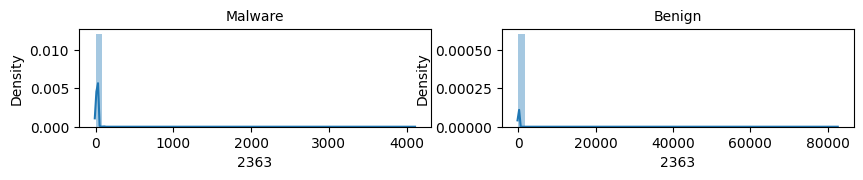

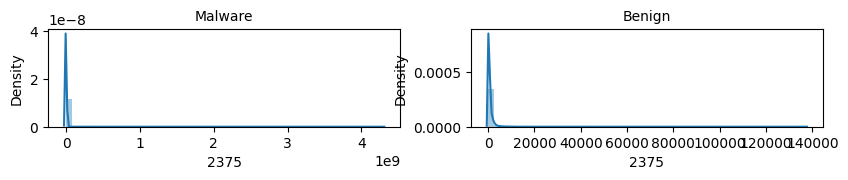

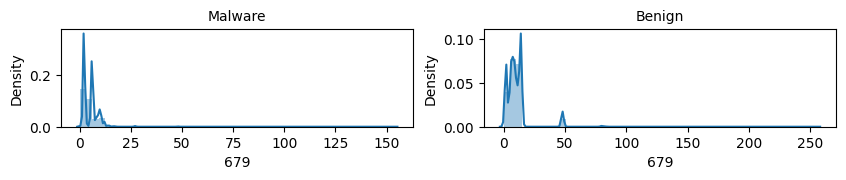

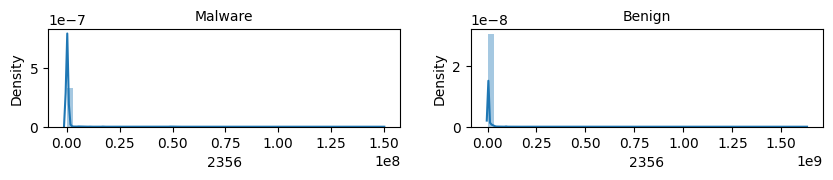

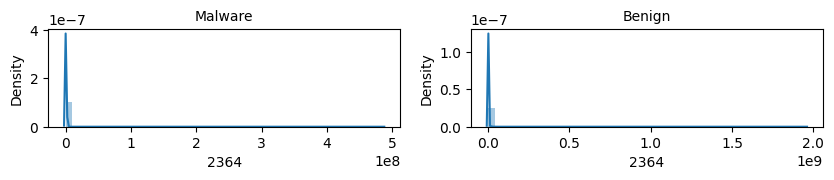

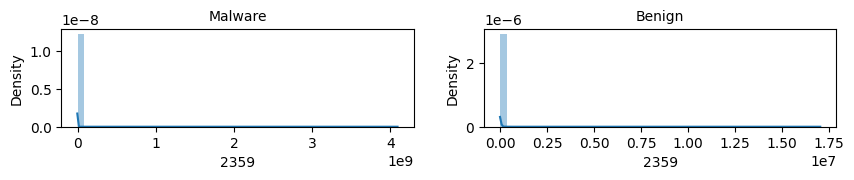

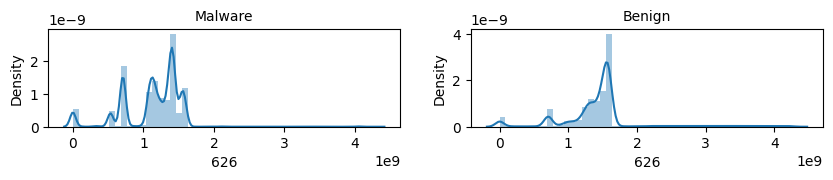

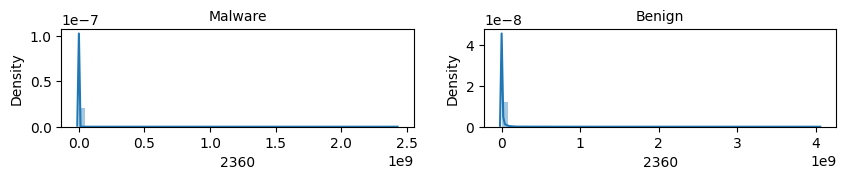

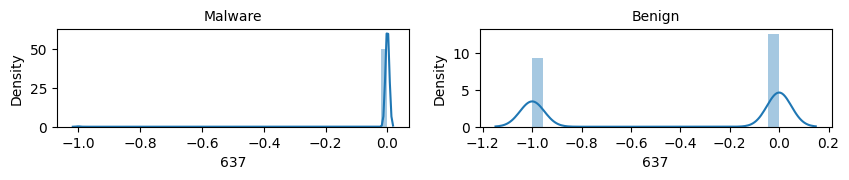

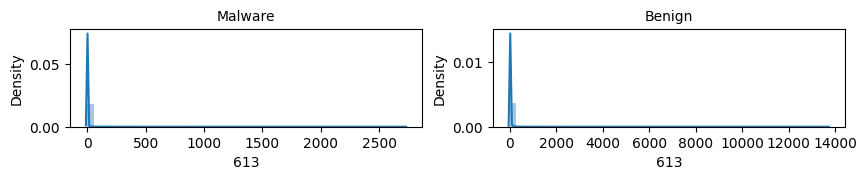

In [ ]:
i=1 # впрочем, наглядную разницу заметить всё ещё тяжело...
for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(df[df['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i+=2